**## import necessary libraries ##**

In [71]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [96]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

In [97]:
reviews = []

In [98]:
# for i in range(1, pages + 1):

for i in range(1, pages + 1):
  print(f"Scraping page {i}")

  # Create URL to collect links from paginated data
  url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

   # Collect HTML data from this page
  response = requests.get(url)

  # Parse content
  content = response.content
  parsed_content = BeautifulSoup(content, 'html.parser')
  for para in parsed_content.find_all("div", {"class": "text_content"}):
      reviews.append(para.get_text())

  print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [99]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This is a route I fly regula...
1,✅ Trip Verified | While BA may have made some...
2,✅ Trip Verified | British Airways new Club Sui...
3,"✅ Trip Verified | Four very pleasant, on time..."
4,Not Verified | We travel extensively over 25...


In [100]:
import os

In [101]:
os.makedirs("data", exist_ok=True)

In [102]:
df.to_csv("data/British_reviews.csv")

We have our dataset for the next process.

**##DataCleaning**

In [103]:
df["reviews"] = df["reviews"].str.split("|", expand=True)[1]
df.head()

,reviews
0,This is a route I fly regularly. Used first c...
1,While BA may have made some positive improve...
2,British Airways new Club Suite is a marked im...
3,"Four very pleasant, on time flights with fri..."
4,We travel extensively over 25 years and ten...


In [104]:
import string

In [105]:
def case_and_punctuation_handling(text):
  lower_case_text = text.lower()
  cleaned_text = lower_case_text.translate(str.maketrans("", "", string.punctuation))
  return cleaned_text
df["cleaned_reviews"] = df["reviews"].apply(case_and_punctuation_handling)
df.head()

,reviews,cleaned_reviews
0,This is a route I fly regularly. Used first c...,this is a route i fly regularly used first cl...
1,While BA may have made some positive improve...,while ba may have made some positive improve...
2,British Airways new Club Suite is a marked im...,british airways new club suite is a marked im...
3,"Four very pleasant, on time flights with fri...",four very pleasant on time flights with frie...
4,We travel extensively over 25 years and ten...,we travel extensively over 25 years and ten...


from the above code, we have converted upper case letters to lower case and removed punctuations.

**# tokenization, stopwords removal and POS tagging**

In [106]:
import nltk

In [107]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [108]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [110]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [111]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet

In [112]:
# POS tagging dictionary.
pos_dict = {"J":wordnet.ADJ, "V":wordnet.VERB, "N":wordnet.NOUN, "R":wordnet.ADV}

def handle_tokenization_stopwords_postags(text):
    # Tokenization.
    tokenized_text = word_tokenize(text)
    # POS-tagging.
    tags = pos_tag(tokenized_text)
    new_text_list = []
    for word, tag in tags:
        # Stopword removal.
        if word not in stopwords.words("english"):
          new_text_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_text_list

df["POS_tagged_reviews"] = df["cleaned_reviews"].apply(handle_tokenization_stopwords_postags)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews
0,This is a route I fly regularly. Used first c...,this is a route i fly regularly used first cl...,"[(route, n), (fly, v), (regularly, r), (used, ..."
1,While BA may have made some positive improve...,while ba may have made some positive improve...,"[(ba, n), (may, None), (made, v), (positive, a..."
2,British Airways new Club Suite is a marked im...,british airways new club suite is a marked im...,"[(british, a), (airways, v), (new, a), (club, ..."
3,"Four very pleasant, on time flights with fri...",four very pleasant on time flights with frie...,"[(four, None), (pleasant, a), (time, n), (flig..."
4,We travel extensively over 25 years and ten...,we travel extensively over 25 years and ten...,"[(travel, v), (extensively, r), (25, None), (y..."


**##Lemmatization**

In [113]:
# Obtaining stem-words with Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def text_lemmatization(pos_data):
    lemma_rev = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rev = lemma_rev + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rev = lemma_rev + " " + lemma
    return lemma_rev

df["lemmatized_reviews"] = df["POS_tagged_reviews"].apply(text_lemmatization)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews,lemmatized_reviews
0,This is a route I fly regularly. Used first c...,this is a route i fly regularly used first cl...,"[(route, n), (fly, v), (regularly, r), (used, ...",route fly regularly use first class security...
1,While BA may have made some positive improve...,while ba may have made some positive improve...,"[(ba, n), (may, None), (made, v), (positive, a...",ba may make positive improvement club world ...
2,British Airways new Club Suite is a marked im...,british airways new club suite is a marked im...,"[(british, a), (airways, v), (new, a), (club, ...",british airways new club suite marked improv...
3,"Four very pleasant, on time flights with fri...",four very pleasant on time flights with frie...,"[(four, None), (pleasant, a), (time, n), (flig...",four pleasant time flight friendly helpful s...
4,We travel extensively over 25 years and ten...,we travel extensively over 25 years and ten...,"[(travel, v), (extensively, r), (25, None), (y...",travel extensively 25 year tend use ba regul...


**##Sentiment_Analysis**

In [121]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [122]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_analysis(sentiment_text):
    score = analyzer.polarity_scores(sentiment_text)
    return score["compound"]

df["VADER_compound_score"] = df["lemmatized_reviews"].apply(vader_analysis)

# function to analyse
def sentiment_classifier(compound_score):
    if compound_score >= 0.5:
        return "Positive"
    elif compound_score < 0 :
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["VADER_compound_score"].apply(sentiment_classifier)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews,lemmatized_reviews,VADER_compound_score,Sentiment
0,This is a route I fly regularly. Used first c...,this is a route i fly regularly used first cl...,"[(route, n), (fly, v), (regularly, r), (used, ...",route fly regularly use first class security...,0.9744,Positive
1,While BA may have made some positive improve...,while ba may have made some positive improve...,"[(ba, n), (may, None), (made, v), (positive, a...",ba may make positive improvement club world ...,0.9169,Positive
2,British Airways new Club Suite is a marked im...,british airways new club suite is a marked im...,"[(british, a), (airways, v), (new, a), (club, ...",british airways new club suite marked improv...,0.6597,Positive
3,"Four very pleasant, on time flights with fri...",four very pleasant on time flights with frie...,"[(four, None), (pleasant, a), (time, n), (flig...",four pleasant time flight friendly helpful s...,0.6486,Positive
4,We travel extensively over 25 years and ten...,we travel extensively over 25 years and ten...,"[(travel, v), (extensively, r), (25, None), (y...",travel extensively 25 year tend use ba regul...,-0.5126,Negative


In [123]:
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts

Sentiment
Positive    465
Negative    432
Neutral     103
Name: count, dtype: int64

In [124]:
df.to_csv("data/BA_reviews_analysed.csv")

**##Data Vizualization: Pie-Chart**

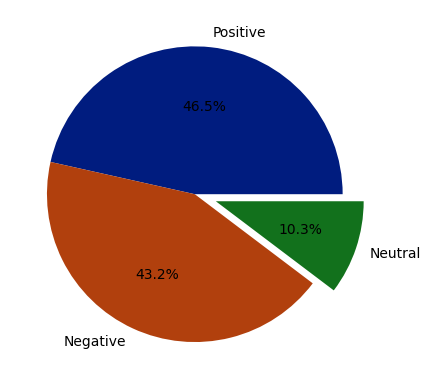

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Declaring data.
data = sentiment_counts.values

# Define Seaborn color palette to use.
palette_color = sns.color_palette("dark") # Use a dark color palette instead

# Plotting data on chart.
plt.pie(data, labels=sentiment_counts.index, colors=palette_color, explode = (0, 0, 0.15), autopct="%.1f%%")

# Displaying chart.
plt.show()

**##Data Vizualization: Word Cloud**

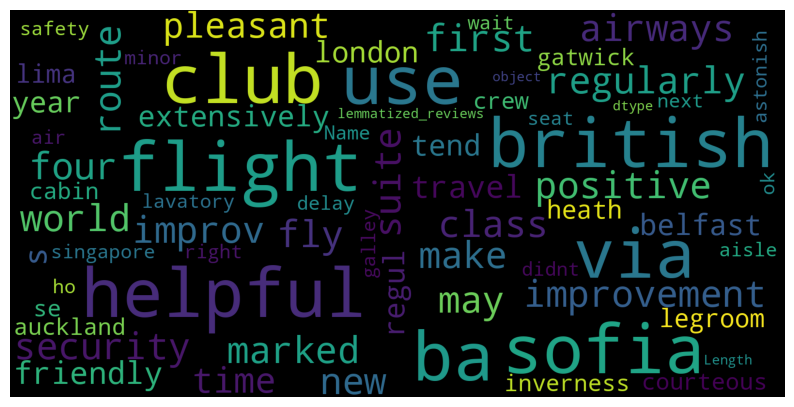

In [130]:
from wordcloud import WordCloud

def vizualize_wordcloud(data):
    wordcloud = WordCloud(background_color="black", max_words=200, max_font_size=35, scale=4, relative_scaling=0.9, random_state=7)
    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis("off")

    plt.imshow(wordcloud)
    plt.show()

vizualize_wordcloud(df["lemmatized_reviews"])

**##Predicting customer buying behaviour**

#Exploratory Data Analysis

In [131]:
# Importing all packages.

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif as mic
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [137]:
# Importing dataset.

cust = pd.read_csv("customer_booking.csv", encoding='latin-1') # Try reading with 'latin-1' encoding
cust.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [140]:
cust.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


The .head() method allows us to view the first 5 rows in the dataset

In [144]:
cust.shape

(50000, 14)

checking the statistical of numerical columns

In [139]:
# Checking columns datatypes.
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [143]:
cust.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [156]:
# Categorical columns.
cat_cols = cust.select_dtypes("object")

# Checking the unique values in Categorical columns.
for col in cat_cols:
    print("\nUnique values for column '{}':".format(col))
    print(cust[col].unique(), "\nUnique count: {}".format(cust[col].nunique()))


Unique values for column 'sales_channel':
['Internet' 'Mobile'] 
Unique count: 2

Unique values for column 'trip_type':
['RoundTrip' 'CircleTrip' 'OneWay'] 
Unique count: 3

Unique values for column 'flight_day':
['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri'] 
Unique count: 7

Unique values for column 'route':
['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANM

In [157]:
# Label Encoding the categorical variables.
label_encode = LabelEncoder()

for col in cat_cols:
    cust[col] = label_encode.fit_transform(cust[col])
    print("\nUnique values for column '{}':".format(col))
    print(cust[col].unique(), "\nUnique count: {}".format(cust[col].nunique()))


Unique values for column 'sales_channel':
[0 1] 
Unique count: 2

Unique values for column 'trip_type':
[2 0 1] 
Unique count: 3

Unique values for column 'flight_day':
[2 6 4 1 3 5 0] 
Unique count: 7

Unique values for column 'route':
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  36  37  38
  39  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 121 122 125 126 127 129 130 131 132 133 134 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 157 158 159 160 161 162 163 165 166 167 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 185 187 188 189 190 192 193 194 195 196 197
 198 199 200 202 203 204 205 207

In [158]:
# Checking the datatypes of converted columns.
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  int64  
 8   booking_origin         50000 non-null  int64  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.3 MB


In [159]:
cust.describe()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,1.987620,84.940480,23.04456,9.06634,3.069860,391.905800,38.263340,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.129873,90.451378,33.88767,5.41266,2.029833,227.297259,32.756539,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,2.000000,21.000000,5.00000,5.00000,1.000000,203.000000,4.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,2.000000,51.000000,17.00000,9.00000,3.000000,381.000000,37.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,2.000000,115.000000,28.00000,13.00000,5.000000,611.000000,57.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,6.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [160]:
# Converting the dataset into features and label.
X = cust.drop("booking_complete", axis=1)
y = cust["booking_complete"]

In [162]:
# Calculating the Mutual Information Scores.

fi_scores = mic(X, y)
fi_df = pd.DataFrame({"Columns": X.columns, "Feature_Importance_Score": fi_scores})
fi_df = fi_df.sort_values(by="Feature_Importance_Score", ascending=False)
fi_df

,Columns,Feature_Importance_Score
7,route,0.053538
8,booking_origin,0.046476
12,flight_duration,0.016568
9,wants_extra_baggage,0.010078
4,length_of_stay,0.007501
2,trip_type,0.006117
11,wants_in_flight_meals,0.002993
6,flight_day,0.001298
1,sales_channel,0.001046
10,wants_preferred_seat,0.000912


**##Data Vizualization: Feature Importance Barplot**

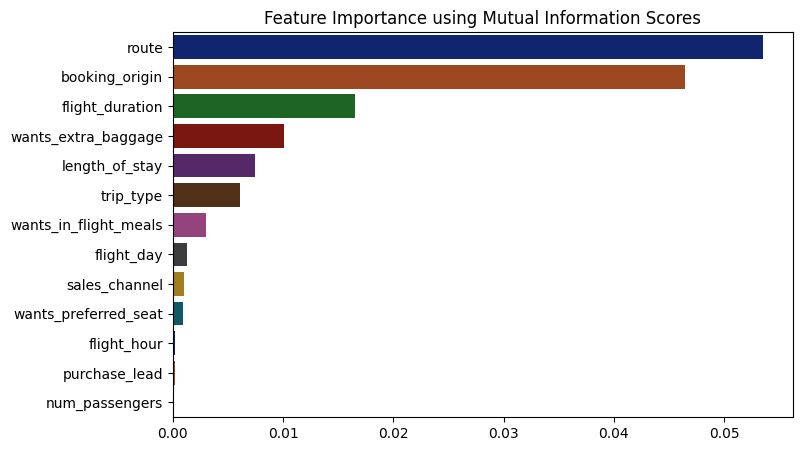

In [167]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Feature_Importance_Score", y="Columns", data=fi_df, palette="dark")
plt.title("Feature Importance using Mutual Information Scores")
plt.xlabel("")
plt.ylabel("")
plt.show()

**##Model Training and Cross-Validation**

In [176]:
# Function to split the data into training and validation set.
def train_val_split(X, y):
    train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=7)
    return train_X, val_X, train_y, val_y

# Function to select the top-n or all the features from data.
def selecting_top_n_or_all_features(n=5):
    if str(n).lower() == "all":
        X = df[list(fi_df.Columns)]
    else:
        X = df[list(fi_df.Columns[:n])]
    # One-Hot-Encoding the variables which were Categorical variables prior to Label-Encoding.
    for col in X.select_dtypes("int32"):
        X = pd.get_dummies(X, columns=[col])
    return X

# Function to fit the data on RandomForestClassifier and product training and validation scores.
def fit_rfc(top_n):
    X = selecting_top_n_or_all_features(top_n)
    train_X, val_X, train_y, val_y = train_val_split(X, y)

    # Normalizing the Dataset.
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    val_X = scaler.transform(val_X)

    model = RandomForestClassifier(random_state=7)
    model.fit(train_X, train_y)

    train_y_pred = model.predict(train_X)
    val_y_pred = model.predict(val_X)

    print("Training Accuracy Score:", accuracy_score(train_y, train_y_pred))
    print("Validation Accuracy Score:", accuracy_score(val_y, val_y_pred))

In [178]:
print("\n===== Model Evaluation for Top-6 features =====\n")
fit_rfc(6)


===== Model Evaluation for Top-6 features =====

Training Accuracy Score: 0.907575
Validation Accuracy Score: 0.8302


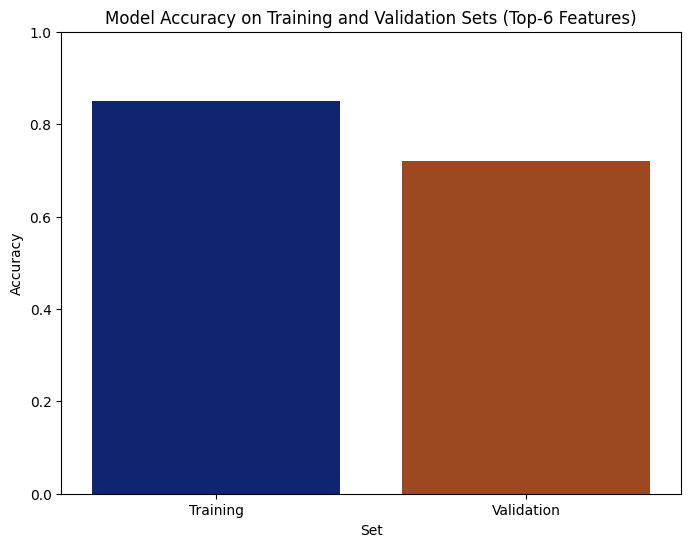

In [182]:
# Data for the bar plot
data = {"Accuracy": [0.85, 0.72],
        "Set": ["Training", "Validation"]}
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Set", y="Accuracy", data=data, palette="dark")
plt.title("Model Accuracy on Training and Validation Sets (Top-6 Features)")
plt.ylim(0, 1)  # Set y-axis limits for better comparison
plt.show()

In [179]:
print("\n===== Model Evaluation for All features =====\n")
fit_rfc("all")


===== Model Evaluation for All features =====

Training Accuracy Score: 0.999825
Validation Accuracy Score: 0.8539


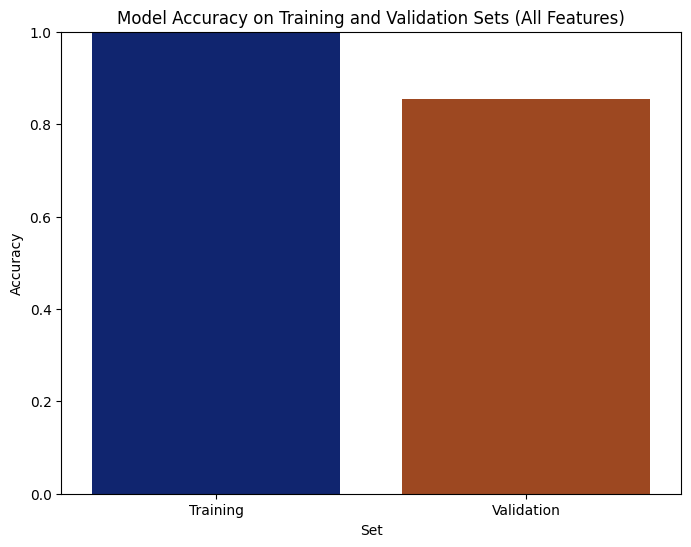

In [183]:
# Data for the bar plot
data = {"Accuracy": [0.999825, 0.8539],
        "Set": ["Training", "Validation"]}
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Set", y="Accuracy", data=data, palette="dark")
plt.title("Model Accuracy on Training and Validation Sets (All Features)")
plt.ylim(0, 1)  # Set y-axis limits for better comparison
plt.show()